In [112]:
import numpy as np
import scipy 
import sklearn
import sklearn.preprocessing
import sklearn.linear_model
import matplotlib.pyplot as plt

In [86]:
def true_data(x):
    return 3 * np.sin(x) + x

In [87]:
def sample_noise(x, scale=1):
    if type(x) == np.ndarray:
        return np.random.normal(scale=scale,size=x.shape[0])
    else: return np.random.normal(scale=scale)

In [127]:
def noisy_data(x):
    return true_data(x).reshape((-1)) + sample_noise(x)

In [128]:
def sample_dataset(N=1000):
    X = np.random.normal(0, 2, size=N).reshape((-1, 1))
    Y = noisy_data(X)
    return X, Y

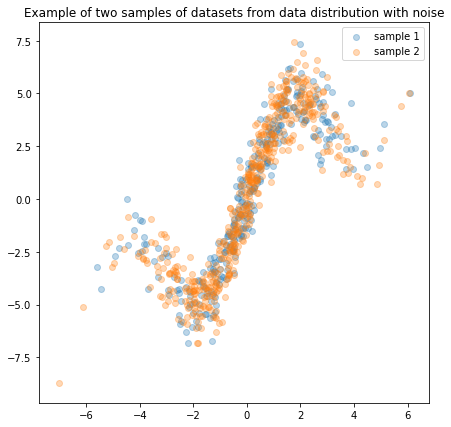

In [269]:
Xs_1, Ys_1 = sample_dataset(300)
Xs_2, Ys_2 = sample_dataset(500)
plt.figure(figsize=(7, 7))
plt.scatter(Xs_1[:, 0], Ys_1, alpha=0.3, label='sample 1')
plt.scatter(Xs_2[:, 0], Ys_2, alpha=0.3, label='sample 2')
plt.title('Example of two samples of datasets from data distribution with noise')
plt.legend()
plt.show()

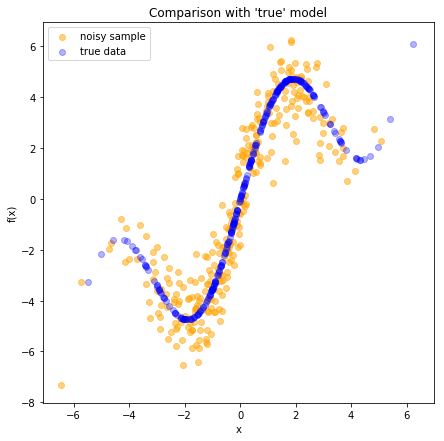

In [130]:
plt.figure(figsize=(7, 7))
plt.scatter(Xs_1, Ys_1, label='noisy sample', color='orange', alpha=0.5)
plt.scatter(x, true_data(x), label='true data', color='blue', alpha=0.3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Comparison with \'true\' model')
plt.legend()
plt.show()

In [334]:
def fitOneModel(degree=1, N=300):
    Xs, Ys = sample_dataset(N)
    # add polynomial features
    p = sklearn.preprocessing.PolynomialFeatures(degree=degree)
    X_p = p.fit_transform(Xs)
#     print(X_p)
    
    lr = sklearn.linear_model.LinearRegression()
    lr.fit(X_p, Ys)
    
    def predict(X_new):
        X_new_p = p.fit_transform(X_new)
#         print(X_new_p)
        return lr.predict(X_new_p)
   
    return predict, X_p, Ys

In [304]:
m, _, _ = fitOneModel(1)

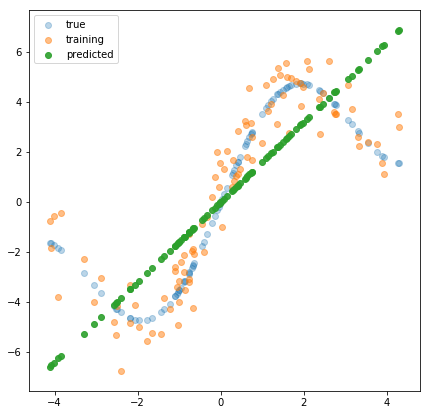

In [305]:
np.random.seed(190)
newDataX, newDataY = sample_dataset(100)
predictedNewY = m(newDataX)
plt.figure(figsize=(7, 7))
plt.scatter(newDataX, true_data(newDataX), label='true', alpha=0.3)
plt.scatter(newDataX, newDataY, label='training', alpha=0.5)
plt.scatter(newDataX, predictedNewY, label='predicted', alpha=0.9)
plt.legend()
plt.show()

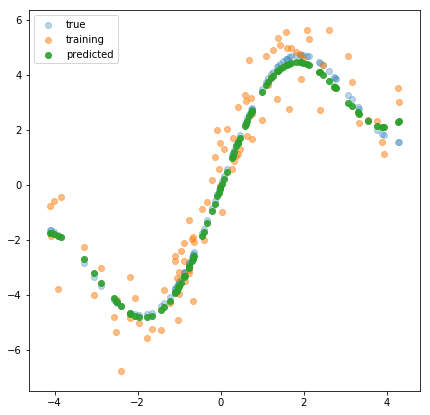

In [354]:
np.random.seed(190)
newDataX, newDataY = sample_dataset(100)
predictedNewY = fitOneModel(1tsu)[0](newDataX)
plt.figure(figsize=(7, 7))
plt.scatter(newDataX, true_data(newDataX), label='true', alpha=0.3)
plt.scatter(newDataX, newDataY, label='training', alpha=0.5)
plt.scatter(newDataX, predictedNewY, label='predicted', alpha=0.9)
plt.legend()
plt.show()

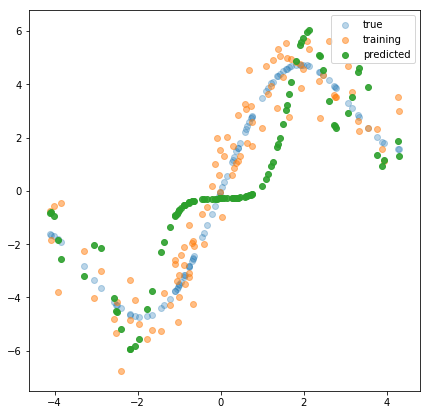

In [361]:
np.random.seed(190)
predictedNewY = fitOneModel(20)[0](newDataX)
plt.figure(figsize=(7, 7))
plt.scatter(newDataX, true_data(newDataX), label='true', alpha=0.3)
plt.scatter(newDataX, newDataY, label='training', alpha=0.5)
plt.scatter(newDataX, predictedNewY, label='predicted', alpha=0.9)
plt.legend()
plt.show()

In [342]:
def errDegrees(degs):
    testDataX, testDataY = sample_dataset(1000)
    testErr = []
    trainErr = []
    for d in degs:
        m, trainX, trainY = fitOneModel(degree=d, N=100000)
        trainErr1 = np.mean((trainY - m(trainX[:, 1, np.newaxis])) ** 2)
        trainErr.append(trainErr1)
        testErr1 = np.mean((testDataY - m(testDataX)) ** 2)
        testErr.append(testErr1)
    return trainErr, testErr

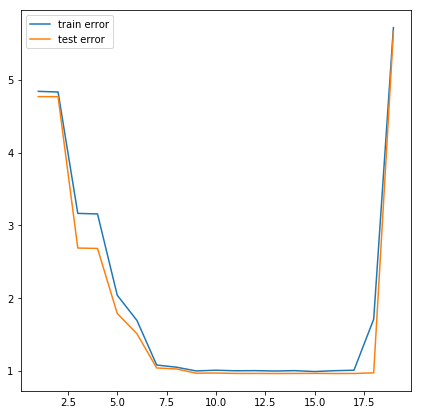

In [369]:
D = np.arange(1, 20)
trainErr, testErr = errDegrees(D)
plt.figure(figsize=(7, 7))
plt.plot(D, trainErr, label='train error')
plt.plot(D, testErr, label='test error')
plt.legend()
plt.show()

In [370]:
def nPredictions(ptX, degree=1,N=1000):
    predictions = []
    for i in range(N):
        m, _, _ = fitOneModel(degree=degree)
        predictions.append(m(ptX))
    predictions = np.concatenate(predictions)
    return predictions

def plotBiasVariance(subplt, ptX, ptY, degree=1):
#     plt.figure(figsize=(5, 5))
    pred_1000 = nPredictions(ptX, N=1000, degree=degree)
    subplt.hist(pred_1000, bins=20, label='predictions', color='green', alpha=0.5)
    subplt.axvline(x=ptY, label='noisy y value', color='orange')
    subplt.axvline(x=true_data(ptX), label='true y value')
    subplt.legend()
    subplt.title.set_text("Predictions for point x={}, using model of degree d={}".format(ptX[0][0], degree))

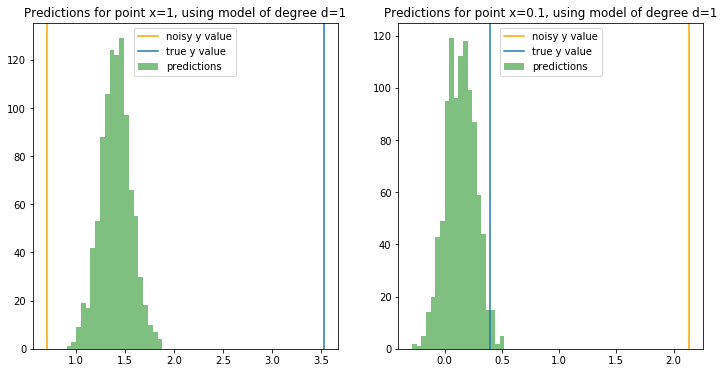

In [366]:
np.random.seed(190)
singlePointX = np.array([[1]])
singlePointY = sample_noise(singlePointX)
plt.figure(figsize=(12, 6))
plotBiasVariance(plt.subplot(1, 2, 1), singlePointX, singlePointY)
singlePointX0 = np.array([[0.1]])
singlePointY0 = sample_noise(singlePointX)
plotBiasVariance(plt.subplot(1, 2, 2), singlePointX0, singlePointY0)
plt.show()

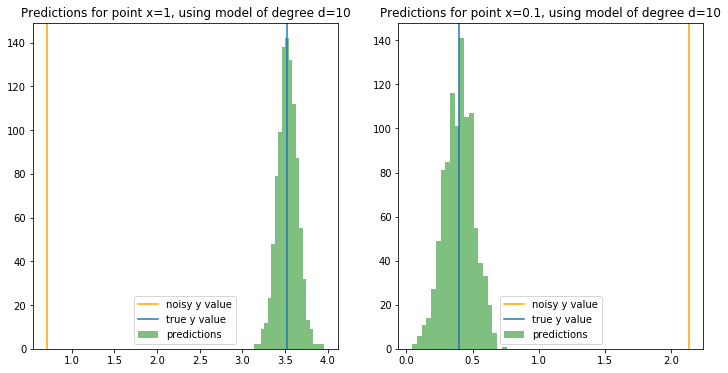

In [367]:
np.random.seed(190)
plt.figure(figsize=(12, 6))
plotBiasVariance(plt.subplot(1, 2, 1), singlePointX, singlePointY, degree=10)
plotBiasVariance(plt.subplot(1, 2, 2), singlePointX0, singlePointY0, degree=10)
plt.show()

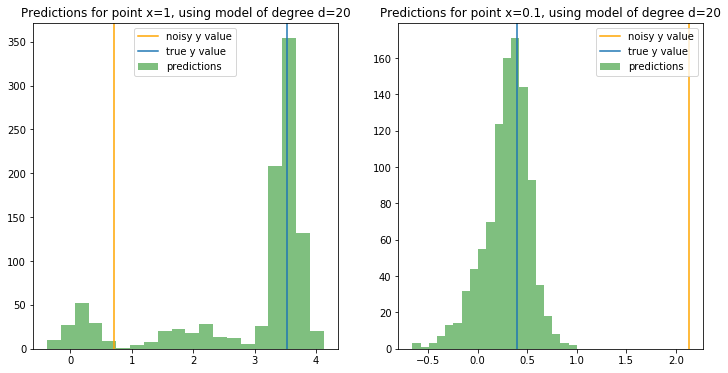

In [368]:
np.random.seed(190)
plt.figure(figsize=(12, 6))
plotBiasVariance(plt.subplot(1, 2, 1), singlePointX, singlePointY, degree=20)
plotBiasVariance(plt.subplot(1, 2, 2), singlePointX0, singlePointY0, degree=20)
plt.show()